In [1]:
# Import the ansys.dpf.core module as ``dpf``
from ansys.dpf import core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operators module
from ansys.dpf.core import operators as ops

In [2]:
# Define the DataSources object
my_data_sources = dpf.DataSources(result_path=examples.find_simple_bar())

In [3]:
# Define the Model object
my_model = dpf.Model(data_sources=my_data_sources)
print(my_model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  element_nodal_forces: ElementalNodal Element nodal Forces
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  element_orientations: ElementalNodal Element Euler Angles
     -  structural_temperature: ElementalNodal Structural temperature
------------------------------
DPF  Meshed Region: 
  3751 nodes 
  3000 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 1 
Cumulative     Time (s) 

In [4]:
# Define the displacement results through the models property `results`
my_displacements = my_model.results.displacement.eval()
print(my_displacements)

DPF displacement(s)Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with Nodal location, 3 components and 3751 entities.



In [5]:
# Extract the data of the displacement field
my_displacements_0 = my_displacements[0].data
print(my_displacements_0)

[[-1.22753781e-08 -1.20861254e-06 -5.02681396e-06]
 [-9.46666013e-09 -1.19379712e-06 -4.64249826e-06]
 [-1.22188426e-08 -1.19494216e-06 -4.63117832e-06]
 ...
 [-1.35911608e-08  1.52559428e-06 -4.29246409e-06]
 [-1.91212290e-08  1.52577102e-06 -4.28782940e-06]
 [-2.69632909e-08  1.52485289e-06 -4.27831232e-06]]


In [6]:
# Define the norm operator (here for a fields container) for the displacement
my_norm = ops.math.norm_fc(fields_container=my_displacements).eval()
print(my_norm[0].data)

[5.17008254e-06 4.79354058e-06 4.78287034e-06 ... 4.55553187e-06
 4.55124420e-06 4.54201053e-06]


In [7]:
# Define the maximum operator and chain it to the norm operator
my_max= ops.min_max.min_max_fc(fields_container=my_norm).outputs.field_max()
print(my_max)

DPF displacement_1.s Field
  Location: Nodal
  Unit: m
  1 entities 
  Data: 1 components and 1 elementary data 

  IDs                   data(m)
  ------------          ----------
  0                     2.523683e-05   
                        




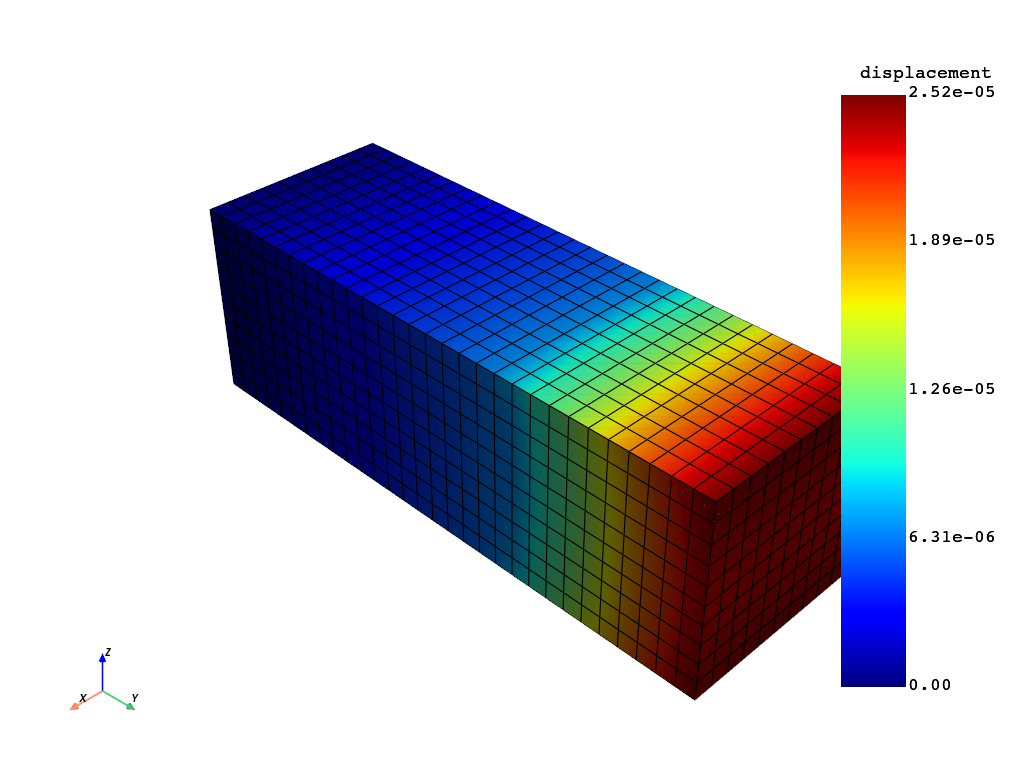

(None, <pyvista.plotting.plotter.Plotter at 0x2573728fef0>)

In [8]:
# Define the support of the plot (here we plot the displacement over the mesh)
my_model.metadata.meshed_region.plot(field_or_fields_container=my_displacements)